In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
#pio.templates.default = "plotly_white"

pd.set_option('display.max_columns', 100)

## Clients

In [2]:
df1 = pd.read_csv("data/Client_14Nov23_4pm.csv", encoding='ISO-8859-1', low_memory=False)
df1.head()

,ÿSalonID,ClientID,FirstName,LastName,Address,City,State,Zip,HomePhone,WorkPhone,Sex,DOB,Anniversary,EMail,Referral,Mailing,Spl_instruction,Total_Visits,Refer_ID,Refer_Name,Balance,Std_Discount,SkinType,HairType,PhotoPath,TimeMark,RowNo,Status,Comment,Client_History,Spl_instruction_desc,Balance_Comment,Skin_desc,Hair_desc,PrivelageCardNo,Privelage_Check,OpeningPoints,ServiceProvider,MostFrequentService,PrivelageTiming,MostFrequentService1,LoyaltyMemberShip_Date,category,sapkey,Create_Date,survey,member_check,MembershipCardNo,Membership_Date,Membership_expiryDate,chksms,Studio_Client,add_on_card,addoncreated_Date,PhotoPath2,CustomerGSTNO,Walletcardno,Walletcheck,mem_card_oth_outlets
0,907,..8220484146,Shankar,NaN,NaN,NaN,NaN,NaN,8220484146,NaN,M,2021-12-27 00:00:00.000,1753-01-01 00:00:00.000,NaN,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nopicture,2023-10-28 16:15:16.567,63966.0,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,NaN,1990-01-01 00:00:00.000,Walkin 1,.907-8220484146,2021-12-27 10:18:52.067,Banners,0.0,NaN,1990-01-01 00:00:00.000,1990-01-01 00:00:00.000,1.0,0.0,NaN,NaN,nopicture,0,NaN,NaN,NaN
1,907,.8393863665,shubh,NaN,NaN,NaN,NaN,NaN,8393863665,NaN,M,2022-03-02 00:00:00.000,1753-01-01 00:00:00.000,NaN,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nopicture,2022-03-02 20:32:23.213,64298.0,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,NaN,1990-01-01 00:00:00.000,Walkin 1,.907-8393863665,2022-03-02 19:23:29.423,Banners,0.0,NaN,1990-01-01 00:00:00.000,1990-01-01 00:00:00.000,1.0,0.0,NaN,NaN,nopicture,0,NaN,NaN,NaN
2,907,.9894384197,Rafi,rufi9888800870,NaN,NaN,NaN,NaN,9894384197,NaN,M,2022-10-05 00:00:00.000,1753-01-01 00:00:00.000,NaN,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nopicture,2023-08-04 17:55:13.310,70781.0,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,NaN,1990-01-01 00:00:00.000,Loyal 1,.907-9894384197,2022-10-05 16:58:38.060,EXISTING CLIENTS,0.0,NaN,1990-01-01 00:00:00.000,1990-01-01 00:00:00.000,1.0,0.0,NaN,NaN,nopicture,0,NaN,NaN,NaN
3,907,.C Balachander9884886817,.C Balachander,NaN,NaN,NaN,NaN,NaN,9884886817,NaN,M,2007-05-03 00:00:00.000,1753-01-01 00:00:00.000,NaN,0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nopicture,2022-04-08 15:25:22.833,37373.0,U,NaN,NaN,00149387,NaN,NaN,NaN,NaN,0.0,NaN,SENTHIL,NaN,0,NaN,1990-01-01 00:00:00.000,Walkin 1,.907-9884886817,2014-11-12 12:50:32.350,Others,0.0,NaN,1990-01-01 00:00:00.000,1990-01-01 00:00:00.000,1.0,0.0,NaN,NaN,nopicture,NaN,NaN,NaN,NaN
4,907,0,Walkin,-Customer,NaN,NaN,NaN,NaN,154,NaN,M,1753-01-01 00:00:00.000,1753-01-01 00:00:00.000,NaN,NaN,NaN,0.0,0.0,0,NaN,0.0,0.0,NaN,NaN,nopicture,2020-03-21 15:28:48.347,2.0,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,W105-0000080154,NaN,EXISTING CLIENTS,0.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,nopicture,NaN,NaN,NaN,NaN


In [3]:
df1.describe()

,City,State,WorkPhone,Spl_instruction,Total_Visits,Balance,Std_Discount,SkinType,HairType,RowNo,Comment,Client_History,Balance_Comment,Skin_desc,Hair_desc,PrivelageCardNo,Privelage_Check,OpeningPoints,member_check,chksms,Studio_Client,add_on_card,addoncreated_Date,Walletcheck,mem_card_oth_outlets
count,30.0,0.0,1.180000e+02,26732.000000,1.100000e+01,31.000000,31.0,0.0,0.0,26702.000000,4.000000e+00,0.0,0.0,0.0,0.0,2.0,26671.0,0.0,26672.000000,26672.000000,26672.0,0.0,0.0,16.0,2.605000e+03
mean,0.0,NaN,6.423571e+09,0.146491,7.043405e+05,0.967742,0.0,NaN,NaN,49035.712756,4.516615e+05,NaN,NaN,NaN,NaN,3001.0,0.0,NaN,0.232304,0.998875,0.0,NaN,NaN,1.0,2.165291e+06
std,0.0,NaN,4.211900e+09,0.353604,4.210434e+05,0.179605,0.0,NaN,NaN,13260.879879,4.408732e+05,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.422309,0.033519,0.0,NaN,NaN,0.0,8.453795e+06
min,0.0,NaN,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,NaN,NaN,2.000000,1.425770e+05,NaN,NaN,NaN,NaN,3001.0,0.0,NaN,0.000000,0.000000,0.0,NaN,NaN,1.0,0.000000e+00
25%,0.0,NaN,3.020775e+04,0.000000,4.963250e+05,1.000000,0.0,NaN,NaN,39308.250000,1.569770e+05,NaN,NaN,NaN,NaN,3001.0,0.0,NaN,0.000000,1.000000,0.0,NaN,NaN,1.0,2.140460e+05
50%,0.0,NaN,8.939469e+09,0.000000,5.851230e+05,1.000000,0.0,NaN,NaN,45986.500000,2.890700e+05,NaN,NaN,NaN,NaN,3001.0,0.0,NaN,0.000000,1.000000,0.0,NaN,NaN,1.0,6.340980e+05
75%,0.0,NaN,9.665945e+09,0.000000,1.014850e+06,1.000000,0.0,NaN,NaN,52673.750000,5.837545e+05,NaN,NaN,NaN,NaN,3001.0,0.0,NaN,0.000000,1.000000,0.0,NaN,NaN,1.0,1.248520e+06
max,0.0,NaN,9.995264e+09,1.000000,1.376456e+06,1.000000,0.0,NaN,NaN,86316.000000,1.085929e+06,NaN,NaN,NaN,NaN,3001.0,0.0,NaN,1.000000,1.000000,0.0,NaN,NaN,1.0,9.952948e+07


In [4]:
len(df1['ClientID'].unique())

26703

In [5]:
len(df1)

26734

In [6]:
df1['category'].value_counts()

category
Walkin 1     15249
Repeat 1      6817
Loyal 1       1967
Regular 1     1555
Freq 1        1083
Unknown          1
Name: count, dtype: int64

## Employees

In [7]:
df2 = pd.read_csv("data/Employee_14Nov23_4pm.csv", encoding='ISO-8859-1', low_memory=False)
df2.head()

,ÿSalonID,EmpID,FirstName,LastName,Address,City,State,Zip,HomePhone,WorkPhone,Mobile,Sex,DOB,Areaofspecialisation,SSN,EMail,Pwd,ShowOnApp,ShowOnSch,AppBookOrder,ShedulingOrder,deactivate,inter,TimeMark,RowNo,Status,Search,doh,EmpAtt
0,907,12751,HABIBUL RAHMAN,12751.0,_,NaN,NaN,NaN,0,0,0,M,1900-01-01 00:00:00.000,HAIR & BEAUTY,NaN,NaN,NaN,NaN,NaN,0,0.0,1,0.0,2018-09-26 15:29:06.030,628.0,U,NaN,2015-03-01 00:00:00.000,0.0
1,907,401367,MADHAN,401367.0,",",NaN,NaN,NaN,NaN,8681840558,8681840558,M,1992-05-30 00:00:00.000,HAIR & BEAUTY,Permanent,NaN,NaN,NaN,NaN,0,0.0,1,0.0,2018-09-26 15:29:06.027,614.0,U,NaN,2014-01-01 00:00:00.000,0.0
2,907,402193,SHAMSUDDEEN,402193.0,_,NaN,NaN,NaN,NaN,0,0,M,2013-06-03 00:00:00.000,HAIR & BEAUTY,Permanent,NaN,NaN,NaN,NaN,0,0.0,1,0.0,2018-09-26 15:29:06.027,593.0,U,NaN,2013-08-28 00:00:00.000,0.0
3,907,402194,SURAJ GURUNG,402194.0,_,NaN,NaN,NaN,NaN,8939344586,8939344586,M,2013-07-29 00:00:00.000,BEAUTICIAN,Permanent,NaN,NaN,NaN,NaN,0,0.0,1,0.0,2018-09-26 15:29:06.027,594.0,U,NaN,2013-08-28 00:00:00.000,0.0
4,907,402195,DIPENGIRI,402195.0,_,NaN,NaN,NaN,NaN,9176741589,9176741589,M,2013-08-14 00:00:00.000,STYLIST,Permanent,NaN,NaN,NaN,NaN,0,0.0,1,0.0,2018-09-26 15:29:06.023,595.0,U,NaN,2013-08-28 00:00:00.000,0.0


## Service Sales

In [8]:
df3 = pd.read_csv("data/Ticket_Product_Details_14Nov23_4pm.csv", encoding='ISO-8859-1', low_memory=False)
df3.head()

,ÿSalonID,TicketID,ProdID,EmpID,Type,Descr,Qty,Tax,BackBar,Retail_Price,Discount_Amt,Discount_Perct,Total,Start_Time,wid,bomreference,TimeMark,RowNo,Status,Billformat,luxurytax,Studio_Status,Mem_Disc,Oth_Disc,Created_Date2
0,907,1,GHHCUTNR,9079999.0,S,HAIRCUT (GENTS),1.0,12.36,NaN,130.0,0.0,0,146.07,27-08-2013 18:12,501,NaN,43:59.0,205478.0,U,D,0.0,N,0.0,0.0,00:00.0
1,907,2,LHHCUTAD,9079999.0,S,"HAIRCUT LADIES ADVANCED(LAYER,MUSHROOM,WEDGE)",1.0,12.36,NaN,400.0,0.0,0,449.44,28-08-2013 10:50,502,NaN,43:59.0,205479.0,U,D,0.0,N,0.0,0.0,00:00.0
2,907,2,LSTHDGEB,9079999.0,S,THREADING - EYEBROWS (LADIES),1.0,12.36,NaN,25.0,0.0,0,28.09,28-08-2013 10:50,502,NaN,43:59.0,205480.0,U,D,0.0,N,0.0,0.0,00:00.0
3,907,3,LBMANIFR,9079999.0,S,MANICURE - FRENCH (LADIES),1.0,12.36,NaN,260.0,0.0,0,292.14,28-08-2013 10:54,502,NaN,43:59.0,205482.0,U,D,0.0,N,0.0,0.0,00:00.0
4,907,3,LSTHDGEB,9079999.0,S,THREADING - EYEBROWS (LADIES),1.0,12.36,NaN,25.0,0.0,0,28.09,28-08-2013 10:53,502,NaN,43:59.0,205481.0,U,D,0.0,N,0.0,0.0,00:00.0


In [9]:
df3.describe()

,TicketID,EmpID,Qty,Tax,Retail_Price,Discount_Amt,Total,bomreference,RowNo,luxurytax,Mem_Disc,Oth_Disc
count,290856.000000,2.887600e+05,288760.000000,288760.00000,288760.000000,286664.000000,288760.000000,2113.0,288760.000000,286664.0,286664.000000,286664.000000
mean,73287.731826,1.131305e+06,1.024990,17.15180,348.519252,50.640623,4290.676384,0.0,353845.174522,0.0,41.859250,6.492284
std,41613.854744,2.118174e+06,0.483829,19.83383,642.896567,117.391441,46058.112617,0.0,99347.945814,0.0,98.779606,57.881897
min,1.000000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,-240.000000
25%,37144.750000,4.100190e+05,1.000000,14.00000,55.000000,5.000000,59.000000,0.0,275640.750000,0.0,0.000000,0.000000
50%,74705.500000,4.126340e+05,1.000000,18.00000,150.000000,15.000000,147.500000,0.0,347830.500000,0.0,15.000000,0.000000
75%,112211.000000,9.019110e+05,1.000000,18.00000,280.000000,35.000000,295.000000,0.0,420020.250000,0.0,35.000000,0.000000
max,140155.000000,9.079999e+06,35.000000,3245.00000,20199.000000,4632.000000,564016.000000,0.0,564055.000000,0.0,2875.000000,4625.000000


In [10]:
len(df3)

290856

In [11]:
df4 = pd.read_csv("data/Tickets_14Nov23_4pm.csv", encoding='ISO-8859-1', low_memory=False)
df4.head()

,ÿSalonID,TicketID,ClientID,SchDate,Referral,Total,Created_Date,Total_WithoutTax,printed,bomreferenceindex,TimeMark,RowNo,Status,Serviceslipno,servicedesc,BillStatus
0,907,1,JERRY9940060569,2013-08-27 00:00:00.000,Request,146.07,2013-08-27 00:00:00.000,130.0,0.0,NaN,2013-08-27 18:13:22.023,108263.0,i,1111111.0,HAIRCUT (GENTS),Closed
1,907,2,Saranya9884402095,2013-08-28 00:00:00.000,Request,477.53,2013-08-28 00:00:00.000,425.0,0.0,NaN,2013-08-28 10:52:27.833,108264.0,i,111112.0,"HAIRCUT LADIES ADVANCED(LAYER,MUSHROOM,WEDGE)/...",Closed
2,907,3,Lakshmi rajkumar9176222704,2013-08-28 00:00:00.000,Request,320.23,2013-08-28 00:00:00.000,285.0,0.0,NaN,2013-08-28 10:55:35.253,108265.0,i,111113.0,THREADING - EYEBROWS (LADIES)/MANICURE - FRENC...,Closed
3,907,4,Vaishali8056111666,2013-08-28 00:00:00.000,Request,56.18,2013-08-28 00:00:00.000,50.0,0.0,NaN,2013-08-28 10:57:18.620,108266.0,i,111114.0,THREADING - EYEBROWS (LADIES)/THREADING - UPPE...,Closed
4,907,5,Sudeep9381057770,2013-08-28 00:00:00.000,Request,95.51,2013-08-28 00:00:00.000,85.0,0.0,NaN,2013-08-28 10:58:54.560,108267.0,i,111115.0,KIDS CUT - BELOW 10 YEARS - WEEK DAYS (GENTS),Closed


In [12]:
len(df4)

142267

In [13]:
#df4['Num_Visits'] = df4.groupby('ClientID')['ClientID'].transform('count')

In [14]:
#df4 = df4.groupby('ClientID').agg({'Num_Visits': 'sum', 'Total': 'sum'}).reset_index()
#df4

In [15]:
#len(df4)

# Customer Segmentation

### RFM Analysis

By creating segments, businesses can tailor their marketing efforts, product offerings, and customer service experiences to better meet the specific needs of each segment.

Questions:
- Who are frequent customers?
- Who are recent (new) customers?
- Who are high-paying customers
- What are the services purchased by the 3 groups?

### Total Transactions per Customer

1. Sum number of services taken by customer

In [16]:
# Try to convert the 'column_name' to int64, handling errors
try:
    df4['TicketID'] = df4['TicketID'].astype('int64')
except ValueError:
    # Handle non-numeric values, for example, replacing them with NaN
    df4['TicketID'] = pd.to_numeric(df4['TicketID'], errors='coerce')

#print(df4.dtypes)

In [17]:
df3['NumServices'] = df3.groupby('TicketID')['TicketID'].transform('count')

In [18]:
# Selecting specific columns from each DataFrame
df3_subset = df3[['TicketID', 'NumServices']]
df4_subset = df4[['TicketID', 'ClientID', 'Total']]

# Performing an inner merge based on the common column 'customer_id'
sales_df = pd.merge(df3_subset, df4_subset, on='TicketID', how='right')

In [19]:
sales_df = sales_df.drop_duplicates(subset=['TicketID'])
len(sales_df)

140156

In [20]:
sales_df.sample(4)

,TicketID,NumServices,ClientID,Total
140995,72417.0,2.0,siva kumar9841448480,224.2
185888,95376.0,1.0,P. Adhithyan9962996187,1200.0
42771,21184.0,3.0,Vidhya9940199699,1625.0
234012,118229.0,2.0,Kavitha9655177398,631.3


In [21]:
sales_df = sales_df[sales_df['ClientID'] != "0"]
len(sales_df)

139669

In [22]:
sales_df = sales_df.groupby('ClientID').agg({'NumServices': 'sum', 'Total': 'sum'}).reset_index()
sales_df.rename(columns={'Total': 'total_spending'}, inplace=True)
sales_df.sample(4)

,ClientID,NumServices,total_spending
20759,rajeshwari9597971496,2.0,187.40
17922,mam8015206082,8.0,531.00
4881,Lydia9686455486,7.0,1293.72
14792,eiango9962564064,2.0,1097.40


In [23]:
sales_df.describe()

,NumServices,total_spending
count,26043.000000,26043.000000
mean,11.142879,3915.547452
std,27.744987,10634.124009
min,1.000000,0.000000
25%,2.000000,277.300000
50%,4.000000,1003.000000
75%,9.000000,3497.510000
max,2065.000000,435922.100000


In [24]:
current_date = datetime.now()
df1['DOB'] = pd.to_datetime(df1['DOB'])
df1['age'] = np.floor((current_date - df1['DOB']).dt.days / 365.25)

In [25]:
df1_subset = df1[['ClientID', 'Sex', 'age', 'HomePhone']]
df1_subset

,ClientID,Sex,age,HomePhone
0,..8220484146,M,2.0,8220484146
1,.8393863665,M,1.0,8393863665
2,.9894384197,M,1.0,9894384197
3,.C Balachander9884886817,M,16.0,9884886817
4,0,M,271.0,154
...,...,...,...,...
26729,Zion9500109746,F,16.0,9500109746
26730,ZOHARA9150721951,F,11.0,9150721951
26731,ztya9884450626,M,5.0,9884450626
26732,zubair8220237654,M,4.0,8220237654


In [26]:
# Performing an inner merge based on the common column 'customer_id'
sales_df = pd.merge(sales_df, df1_subset, on='ClientID', how='left')
len(sales_df)

26043

In [27]:
sales_df

,ClientID,NumServices,total_spending,Sex,age,HomePhone
0,..8220484146,4.0,4425.90,M,2.0,8220484146
1,.8393863665,3.0,495.60,M,1.0,8393863665
2,.9894384197,18.0,7776.20,M,1.0,9894384197
3,.C Balachander9884886817,11.0,3250.73,M,16.0,9884886817
4,A Velu9556186556,1.0,189.75,M,6.0,9556186556
...,...,...,...,...,...,...
26038,ziaulhAQ9943699607,4.0,736.00,M,7.0,9943699607
26039,zil7373165752,13.0,1917.50,M,4.0,7373165752
26040,ztya9884450626,1.0,212.40,M,5.0,9884450626
26041,zubair8220237654,4.0,3256.80,M,4.0,8220237654


In [28]:
selected_columns = ["NumServices", "age", "total_spending", "age"]
correlation_matrix = sales_df[selected_columns].corr().round(2)
correlation_matrix

,NumServices,age,total_spending,age
NumServices,1.00,0.18,0.72,0.18
age,0.18,1.00,0.11,1.00
total_spending,0.72,0.11,1.00,0.11
age,0.18,1.00,0.11,1.00


<Axes: >

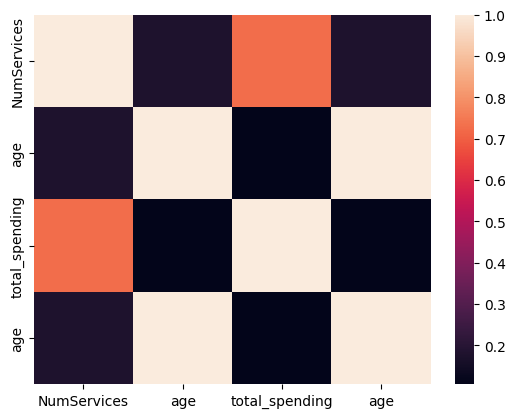

In [29]:
sns.heatmap(sales_df[selected_columns].corr())

In [30]:
df3['Bill_DateTime'] = pd.to_datetime(df3['Start_Time'], format='%d-%m-%Y %H:%M', errors='coerce')

df3['Bill_Date'] = df3['Bill_DateTime'].dt.date
df3['Bill_Time'] = df3['Bill_DateTime'].dt.time

df3 = df3.drop(columns=['Bill_DateTime', 'Start_Time'])

df3.sample(1)

,ÿSalonID,TicketID,ProdID,EmpID,Type,Descr,Qty,Tax,BackBar,Retail_Price,Discount_Amt,Discount_Perct,Total,wid,bomreference,TimeMark,RowNo,Status,Billformat,luxurytax,Studio_Status,Mem_Disc,Oth_Disc,Created_Date2,NumServices,Bill_Date,Bill_Time
64406,907,33813,LHHCUTCS,402547.0,S,HAIR MAKEOVER - LADIES,1.0,14.0,NaN,690.0,90.0,0,684.0,502,NaN,00:05.6,269951.0,i,D,0.0,N,90.0,0.0,00:00.0,4,2015-08-31,19:43:00


In [31]:
# Selecting specific columns from each DataFrame
df1_subset = df1[['ClientID', 'Sex']]
df3_subset = df3[['TicketID', 'NumServices', 'Bill_Date']]
df4_subset = df4[['TicketID', 'ClientID', 'Total']]

merged_df = pd.merge(df3_subset, df4_subset, on='TicketID', how='left')
client_services_df = pd.merge(merged_df, df1_subset, on='ClientID', how='left')

# Performing an inner merge based on the common column 'customer_id'
client_services_df.head()

,TicketID,NumServices,Bill_Date,ClientID,Total,Sex
0,1,1993,2013-08-27,JERRY9940060569,146.07,M
1,2,94,2013-08-28,Saranya9884402095,477.53,F
2,2,94,2013-08-28,Saranya9884402095,477.53,F
3,3,3,2013-08-28,Lakshmi rajkumar9176222704,320.23,F
4,3,3,2013-08-28,Lakshmi rajkumar9176222704,320.23,F


In [32]:
len(client_services_df)

290856

In [33]:
len(df3)

290856

In [34]:
grouped = sales_df.groupby('Sex')['total_spending'].median()
grouped

Sex
F    1233.10
M     855.50
f    1112.00
m    1060.82
Name: total_spending, dtype: float64

In [35]:
sales_df['Sex'] = sales_df['Sex'].apply(lambda x: str(x).upper())

In [36]:
# Drop rows where 'Sex' is NaN
sales_df['Sex'] = sales_df['Sex'].replace("NAN", np.nan)
sales_df_filtered = sales_df[sales_df['Sex'].notna()]

# Group by 'Sex' and calculate the median total spending
grouped = sales_df_filtered.groupby('Sex')['total_spending'].median()
grouped

Sex
F    1232.51
M     855.50
Name: total_spending, dtype: float64

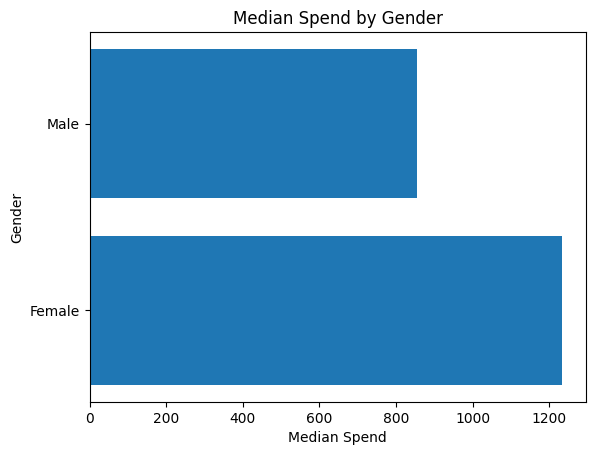

In [37]:
gender_labels = {
    "F": 'Female',
    "M": 'Male'
}

plt.barh([gender_labels[x] for x in grouped.index], grouped.values)

plt.xlabel('Median Spend')
plt.ylabel('Gender')
plt.title('Median Spend by Gender')

plt.show()

#### Calculating Recency, Frequency and Monetory

In [38]:
df4['Created_Date'] = pd.to_datetime(df4['Created_Date'])
df4['Created_Date'].max()

Timestamp('2023-11-14 00:00:00')

In [39]:
cutoff_date = df4['Created_Date'].max()

# Calculate recency
df4['Recency'] = (cutoff_date - df4.groupby('ClientID')['Created_Date'].transform('max')).dt.days

In [40]:
recency_df = df4[['ClientID', 'Recency']]

In [41]:
sales_df = pd.merge(sales_df, recency_df, on='ClientID', how='left')
sales_df

,ClientID,NumServices,total_spending,Sex,age,HomePhone,Recency
0,..8220484146,4.0,4425.9,M,2.0,8220484146,17.0
1,..8220484146,4.0,4425.9,M,2.0,8220484146,17.0
2,..8220484146,4.0,4425.9,M,2.0,8220484146,17.0
3,.8393863665,3.0,495.6,M,1.0,8393863665,622.0
4,.9894384197,18.0,7776.2,M,1.0,9894384197,144.0
...,...,...,...,...,...,...,...
139663,zil7373165752,13.0,1917.5,M,4.0,7373165752,709.0
139664,ztya9884450626,1.0,212.4,M,5.0,9884450626,1916.0
139665,zubair8220237654,4.0,3256.8,M,4.0,8220237654,1632.0
139666,zubair8220237654,4.0,3256.8,M,4.0,8220237654,1632.0


In [42]:
sales_df["Monetary"] = sales_df["total_spending"]
sales_df["Frequency"] = sales_df["NumServices"]
sales_df

,ClientID,NumServices,total_spending,Sex,age,HomePhone,Recency,Monetary,Frequency
0,..8220484146,4.0,4425.9,M,2.0,8220484146,17.0,4425.9,4.0
1,..8220484146,4.0,4425.9,M,2.0,8220484146,17.0,4425.9,4.0
2,..8220484146,4.0,4425.9,M,2.0,8220484146,17.0,4425.9,4.0
3,.8393863665,3.0,495.6,M,1.0,8393863665,622.0,495.6,3.0
4,.9894384197,18.0,7776.2,M,1.0,9894384197,144.0,7776.2,18.0
...,...,...,...,...,...,...,...,...,...
139663,zil7373165752,13.0,1917.5,M,4.0,7373165752,709.0,1917.5,13.0
139664,ztya9884450626,1.0,212.4,M,5.0,9884450626,1916.0,212.4,1.0
139665,zubair8220237654,4.0,3256.8,M,4.0,8220237654,1632.0,3256.8,4.0
139666,zubair8220237654,4.0,3256.8,M,4.0,8220237654,1632.0,3256.8,4.0


In [43]:
sales_df = sales_df.drop_duplicates()
len(sales_df)

26043

In [100]:
sales_df = sales_df[['ClientID', 'Recency', 'Frequency', 'Monetary']]
sales_df.head()

,ClientID,Recency,Frequency,Monetary
0,..8220484146,17.0,4.0,4425.90
3,.8393863665,622.0,3.0,495.60
4,.9894384197,144.0,18.0,7776.20
11,.C Balachander9884886817,732.0,11.0,3250.73
15,A Velu9556186556,2459.0,1.0,189.75


In [101]:
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

## Statistics

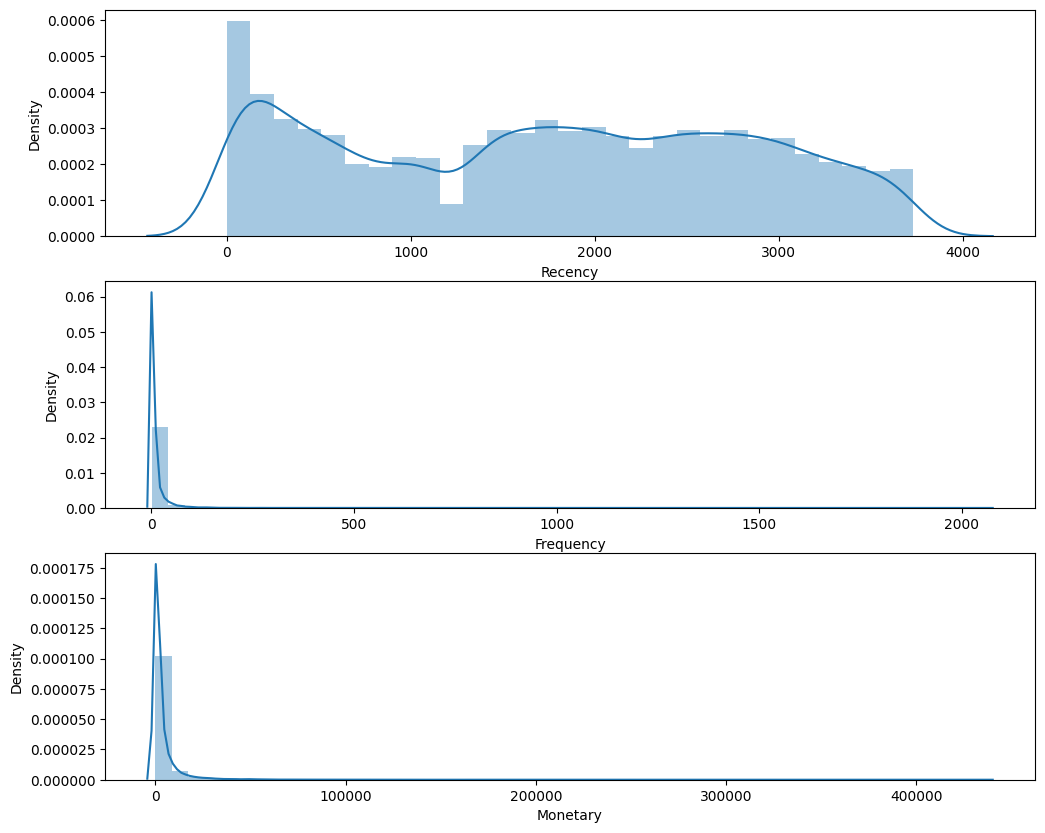

In [102]:
plt.figure(figsize=(12,10))

# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(sales_df['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(sales_df['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(sales_df['Monetary'])

# Show the plot
plt.show()

In [103]:
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(10, 8))

    # Original distribution
    sns.histplot(sales_df[x], ax=ax[0, 0], bins=50, kde=True)
    ax[0, 0].set_title('Original Distribution')

    # Log-transformed distribution
    log_transformed = np.log1p(sales_df[x])
    sns.histplot(log_transformed, ax=ax[0, 1], bins=50, kde=True)
    ax[0, 1].set_title('Log-Transformed Distribution')

    # Square root-transformed distribution
    sqrt_transformed = np.sqrt(sales_df[x])
    sns.histplot(sqrt_transformed, ax=ax[1, 0], bins=50, kde=True)
    ax[1, 0].set_title('Square Root-Transformed Distribution')

    # Box-Cox-transformed distribution
    boxcox_transformed, _ = stats.boxcox(sales_df[x] + 1)  # Add 1 to handle zero values
    sns.histplot(boxcox_transformed, ax=ax[1, 1], bins=50, kde=True)
    ax[1, 1].set_title('Box-Cox-Transformed Distribution')

    plt.tight_layout()
    plt.show()

    print('Log Transform: Skewness from', sales_df[x].skew().round(2), 'to', log_transformed.skew().round(2))
    print('Square Root Transform: Skewness from', sales_df[x].skew().round(2), 'to', sqrt_transformed.skew().round(2))
    print('Box-Cox Transform: Skewness from', sales_df[x].skew().round(2), 'to', pd.Series(boxcox_transformed).skew().round(2))

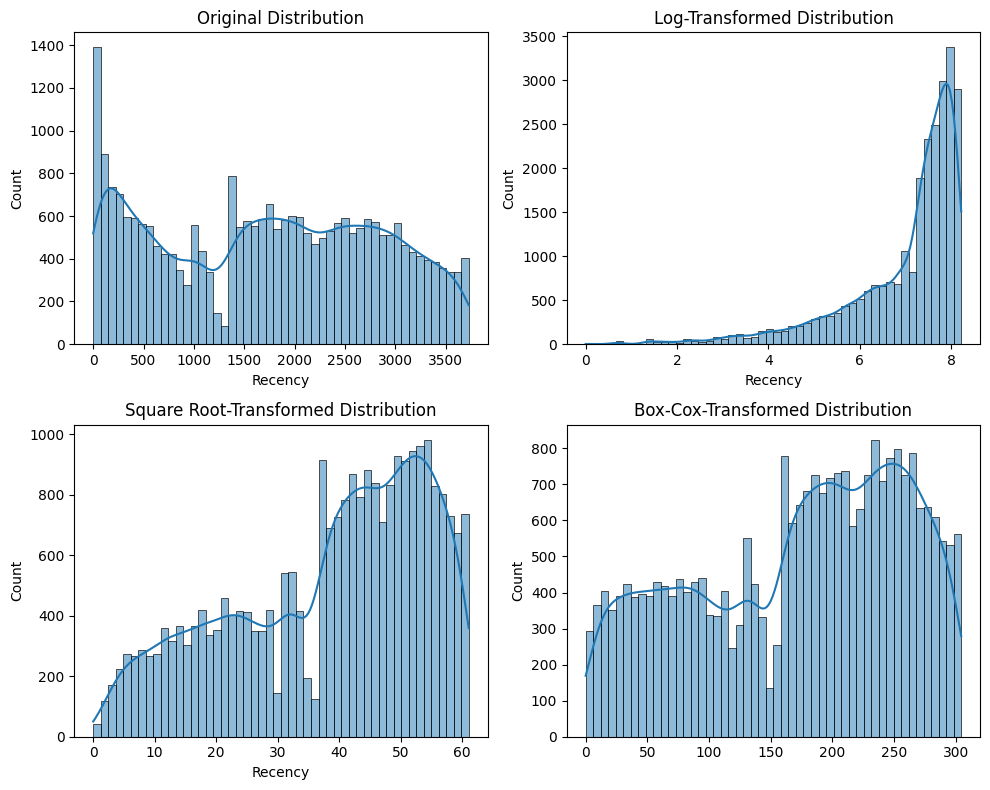

Log Transform: Skewness from -0.0 to -1.82
Square Root Transform: Skewness from -0.0 to -0.58
Box-Cox Transform: Skewness from -0.0 to -0.38


In [104]:
analyze_skewness('Recency')

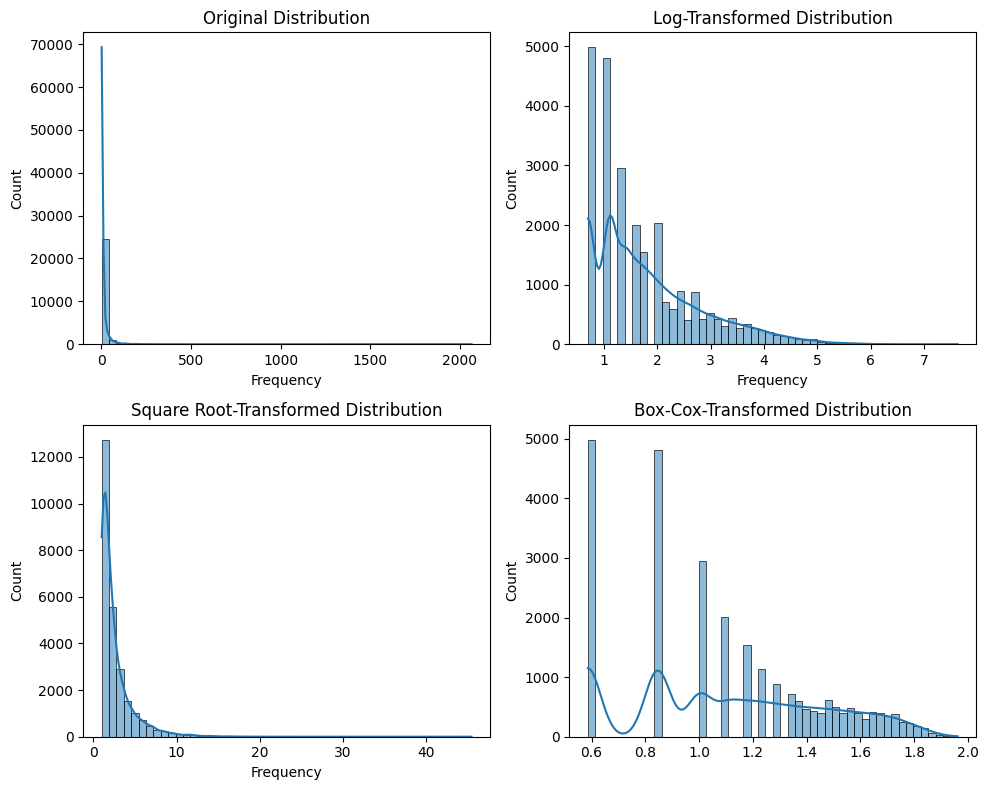

Log Transform: Skewness from 20.78 to 1.09
Square Root Transform: Skewness from 20.78 to 3.01
Box-Cox Transform: Skewness from 20.78 to 0.18


In [105]:
analyze_skewness('Frequency')

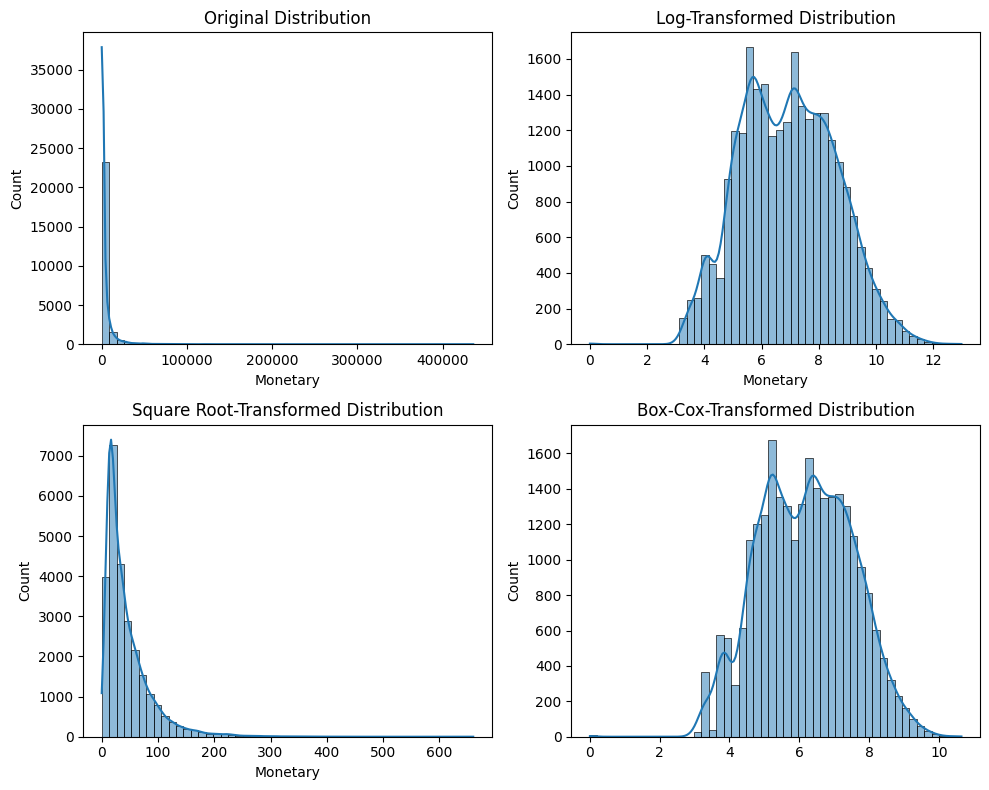

Log Transform: Skewness from 12.13 to 0.13
Square Root Transform: Skewness from 12.13 to 2.82
Box-Cox Transform: Skewness from 12.13 to 0.01


In [106]:
analyze_skewness('Monetary')

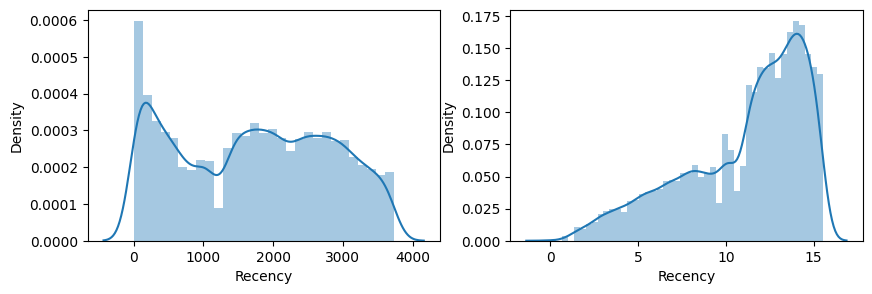

-0.0
-0.87


In [107]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
sns.distplot(sales_df['Recency'], ax=ax[0])
sns.distplot(np.cbrt(sales_df['Recency']), ax=ax[1])
plt.show()
print(sales_df['Recency'].skew().round(2))
print(np.cbrt(sales_df['Recency']).skew().round(2))

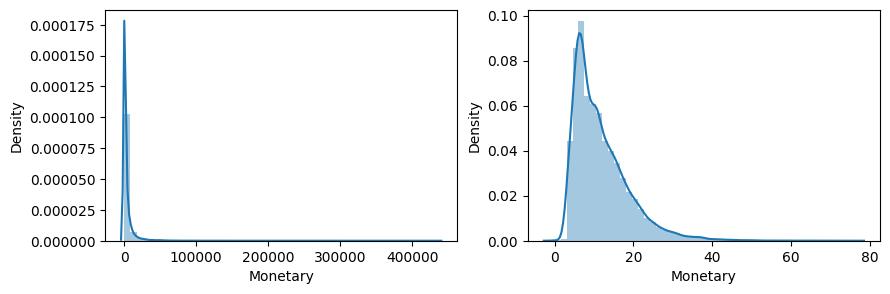

12.13
1.62


In [108]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
sns.distplot(sales_df['Monetary'], ax=ax[0])
sns.distplot(np.cbrt(sales_df['Monetary']), ax=ax[1])
plt.show()
print(sales_df['Monetary'].skew().round(2))
print(np.cbrt(sales_df['Monetary']).skew().round(2))

In [109]:
# Set the Numbers
from scipy import stats
customers_fix = pd.DataFrame()
customers_fix["Recency"] = pd.Series(np.cbrt(sales_df['Recency'])).values
customers_fix["Frequency"] = stats.boxcox(sales_df['Frequency'])[0]
customers_fix["MonetaryValue"] = pd.Series(np.cbrt(sales_df['Monetary'])).values
customers_fix.tail()

,Recency,Frequency,MonetaryValue
26038,13.763018,1.150490,9.028715
26039,8.916931,1.834232,12.423533
26040,12.420293,0.000000,5.966480
26041,11.773531,1.150490,14.822804
26042,7.179054,0.630477,6.787491


In [110]:
# Import library
from sklearn.preprocessing import StandardScaler
# Initialize the Object
scaler = StandardScaler()
# Fit and Transform The Data
scaler.fit(customers_fix)
customers_normalized = scaler.transform(customers_fix)
# Assert that it has mean 0 and variance 1
print(customers_normalized.mean(axis = 0).round(2)) 
print(customers_normalized.std(axis = 0).round(2)) 

[ 0. -0. -0.]
[1. 1. 1.]


In [111]:
pd.DataFrame(customers_normalized).head()

,0,1,2
0,-2.463477,0.068103,0.665462
1,-0.737951,-0.203139,-0.547505
2,-1.691041,1.181456,1.149404
3,-0.600210,0.866763,0.436566
4,0.697257,-1.463552,-0.856604


## Clustering

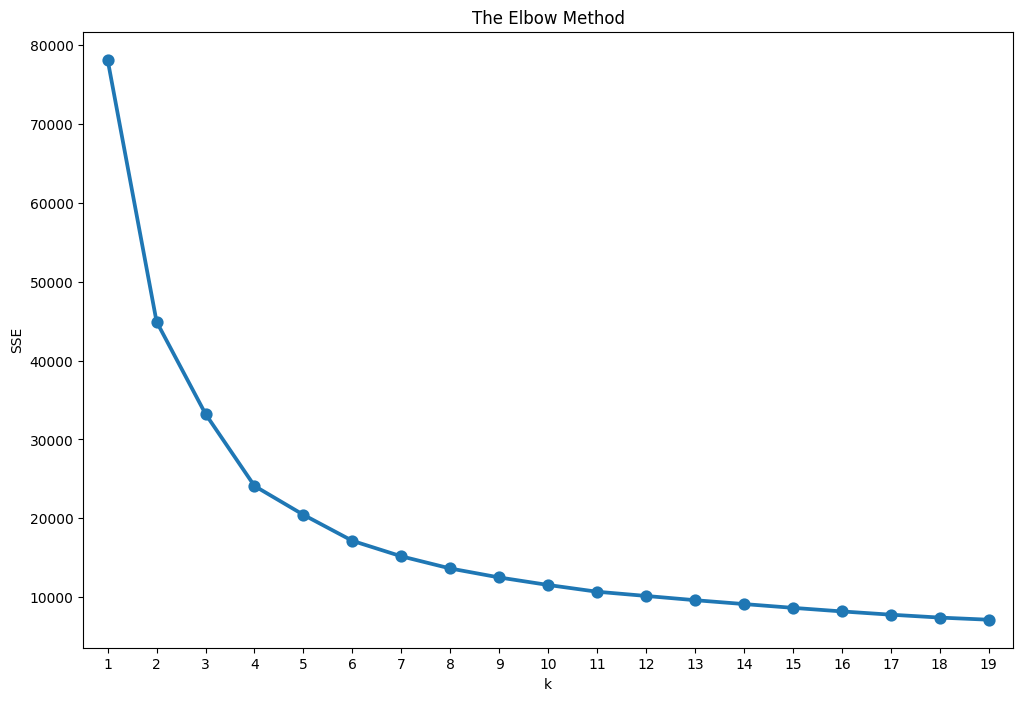

In [112]:
plt.figure(figsize=(12,8))

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
K = range(1, 20)

distortions = []
inertias = []
mapping1 = {}
sse = {}
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    
    distortions.append(sum(np.min(cdist(customers_normalized, kmeans.cluster_centers_,
                                        'euclidean'), axis=1)) / customers_normalized.shape[0])
    inertias.append(kmeans.inertia_)
 
    mapping1[k] = sum(np.min(cdist(customers_normalized, kmeans.cluster_centers_,
                                   'euclidean'), axis=1)) / customers_normalized.shape[0]
    
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [113]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(customers_normalized)
model.labels_.shape

(26043,)

In [114]:
sales_df.shape

(26043, 4)

In [115]:
sales_df["Cluster"] = model.labels_
sales_df.head()

,ClientID,Recency,Frequency,Monetary,Cluster
0,..8220484146,17.0,4.0,4425.90,1
3,.8393863665,622.0,3.0,495.60,1
4,.9894384197,144.0,18.0,7776.20,0
11,.C Balachander9884886817,732.0,11.0,3250.73,0
15,A Velu9556186556,2459.0,1.0,189.75,2


In [116]:
sales_df.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(1)

Recency Frequency Monetary       
           mean      mean     mean  count
Cluster                                  
0        1479.3      32.5  12030.9   6912
1         391.3       4.8   1613.5   5751
2        2424.0       2.8    712.7  13380

In [117]:
# Create the dataframe
df_normalized = pd.DataFrame(customers_normalized, columns=['Recency', 'Frequency', 'MonetaryValue'])
df_normalized['ID'] = sales_df.index
df_normalized['Cluster'] = model.labels_
df_normalized.head()

,Recency,Frequency,MonetaryValue,ID,Cluster
0,-2.463477,0.068103,0.665462,0,1
1,-0.737951,-0.203139,-0.547505,3,1
2,-1.691041,1.181456,1.149404,4,0
3,-0.600210,0.866763,0.436566,11,0
4,0.697257,-1.463552,-0.856604,15,2


In [118]:
# Melt The Data
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()

,ID,Cluster,Attribute,Value
0,0,1,Recency,-2.463477
1,3,1,Recency,-0.737951
2,4,0,Recency,-1.691041
3,11,0,Recency,-0.600210
4,15,2,Recency,0.697257


In [119]:
df_nor_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78129 entries, 0 to 78128
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         78129 non-null  int64  
 1   Cluster    78129 non-null  int32  
 2   Attribute  78129 non-null  object 
 3   Value      78129 non-null  float64
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 2.1+ MB


In [120]:
# Aggregate data by each customer
fig3 = df_nor_melt.groupby('Cluster').agg({'ID': lambda x: len(x)}).reset_index()


# Rename columns
fig3.rename(columns={'ID': 'Count'}, inplace=True)
fig3['percent'] = (fig3['Count'] / fig3['Count'].sum()) * 100
fig3['percent'] = fig3['percent'].round(1)

fig3.head()

,Cluster,Count,percent
0,0,20736,26.5
1,1,17253,22.1
2,2,40140,51.4


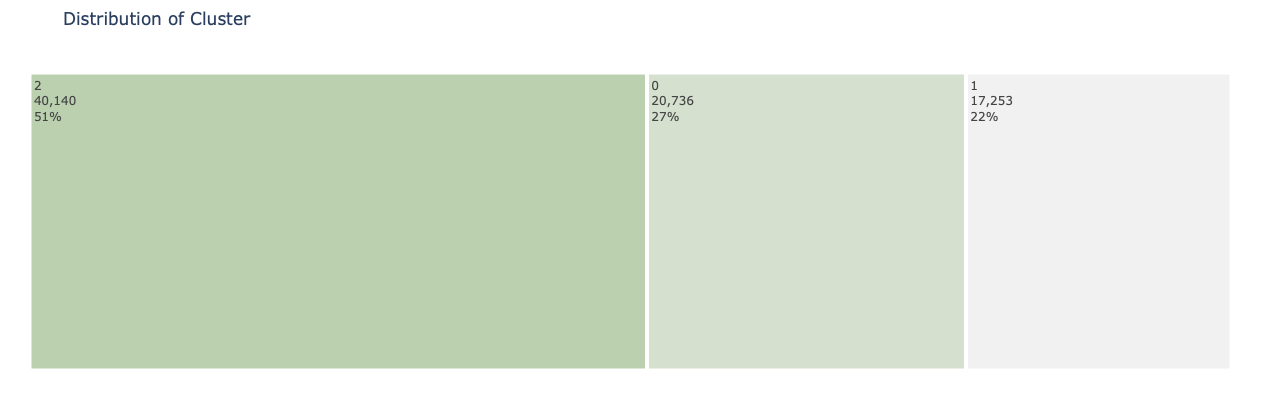

In [121]:
#Creating a Treemap with Plotly Express
# colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] #color palette
colors=['#bad0af','#d5e0cf','#f1f1f1','#f1d4d4'] #color palette
import plotly.express as px

fig = px.treemap(fig3, path=['Cluster'],values='Count'
                 , width=800, height=400
                 ,title="Distribution of Cluster")

fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))

fig.data[0].textinfo = 'label+text+value+percent root'
fig.show()

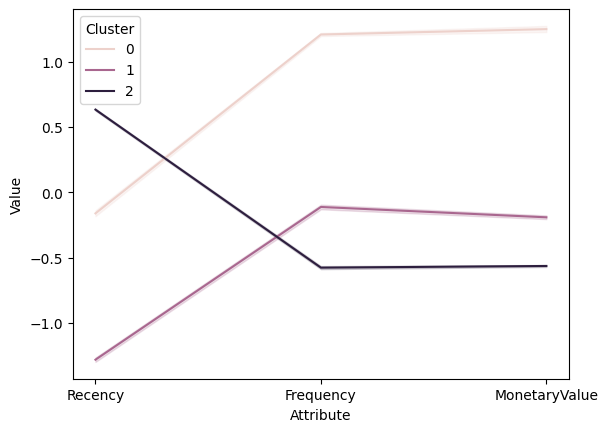

In [122]:
# Assuming 'Attribute', 'Value', and 'Cluster' are column names in your DataFrame
sns.lineplot(x='Attribute', y='Value', hue='Cluster', data=df_nor_melt)
plt.show()

In [123]:
sales_df.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(1)

Recency Frequency Monetary       
           mean      mean     mean  count
Cluster                                  
0        1479.3      32.5  12030.9   6912
1         391.3       4.8   1613.5   5751
2        2424.0       2.8    712.7  13380

In [125]:
sales_df

,ClientID,Recency,Frequency,Monetary,Cluster
0,..8220484146,17.0,4.0,4425.90,1
3,.8393863665,622.0,3.0,495.60,1
4,.9894384197,144.0,18.0,7776.20,0
11,.C Balachander9884886817,732.0,11.0,3250.73,0
15,A Velu9556186556,2459.0,1.0,189.75,2
...,...,...,...,...,...
139656,ziaulhAQ9943699607,2607.0,4.0,736.00,2
139657,zil7373165752,709.0,13.0,1917.50,0
139664,ztya9884450626,1916.0,1.0,212.40,2
139665,zubair8220237654,1632.0,4.0,3256.80,2


In [129]:
cluster_avg = sales_df[['Recency', 'Frequency', 'Monetary', 'Cluster']].groupby('Cluster').mean()
population_avg = sales_df[['Recency', 'Frequency', 'Monetary', 'Cluster']].mean()
relative_imp = cluster_avg / population_avg - 1
relative_imp

,Cluster,Frequency,Monetary,Recency
Cluster,,,,
0,NaN,1.917881,2.072596,-0.142151
1,NaN,-0.572537,-0.587913,-0.773076
2,NaN,-0.744674,-0.817989,0.405718


In [132]:
rfm_fig = sales_df[['Recency', 'Frequency', 'Monetary', 'Cluster']].copy()

#Remove the outlier for visualization
y1 = rfm_fig['Frequency']
size = rfm_fig.shape[0]
removed_outliers = y1.between(y1.quantile(.05), y1.quantile(.95))
print(str(y1[removed_outliers].size) + "/" + str(size) + " data points remain.") 
index_names = rfm_fig[~removed_outliers].index 
rfm_fig.drop(index_names, inplace=True)

#Remove the outlier for visualization
y2 = rfm_fig['Recency']
size = rfm_fig.shape[0]
removed_outliers = y2.between(y2.quantile(.05), y2.quantile(.95))
print(str(y2[removed_outliers].size) + "/" + str(size) + " data points remain.") 
index_names = rfm_fig[~removed_outliers].index 
rfm_fig.drop(index_names, inplace=True)

#Remove the outlier for visualization
y3 = rfm_fig['Monetary']
size = rfm_fig.shape[0]
removed_outliers = y3.between(y3.quantile(.05), y3.quantile(.95))
print(str(y3[removed_outliers].size) + "/" + str(size) + " data points remain.") 
index_names = rfm_fig[~removed_outliers].index 
rfm_fig.drop(index_names, inplace=True)

24753/26043 data points remain.
22282/24753 data points remain.
20167/22282 data points remain.


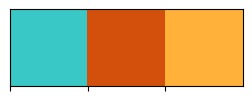

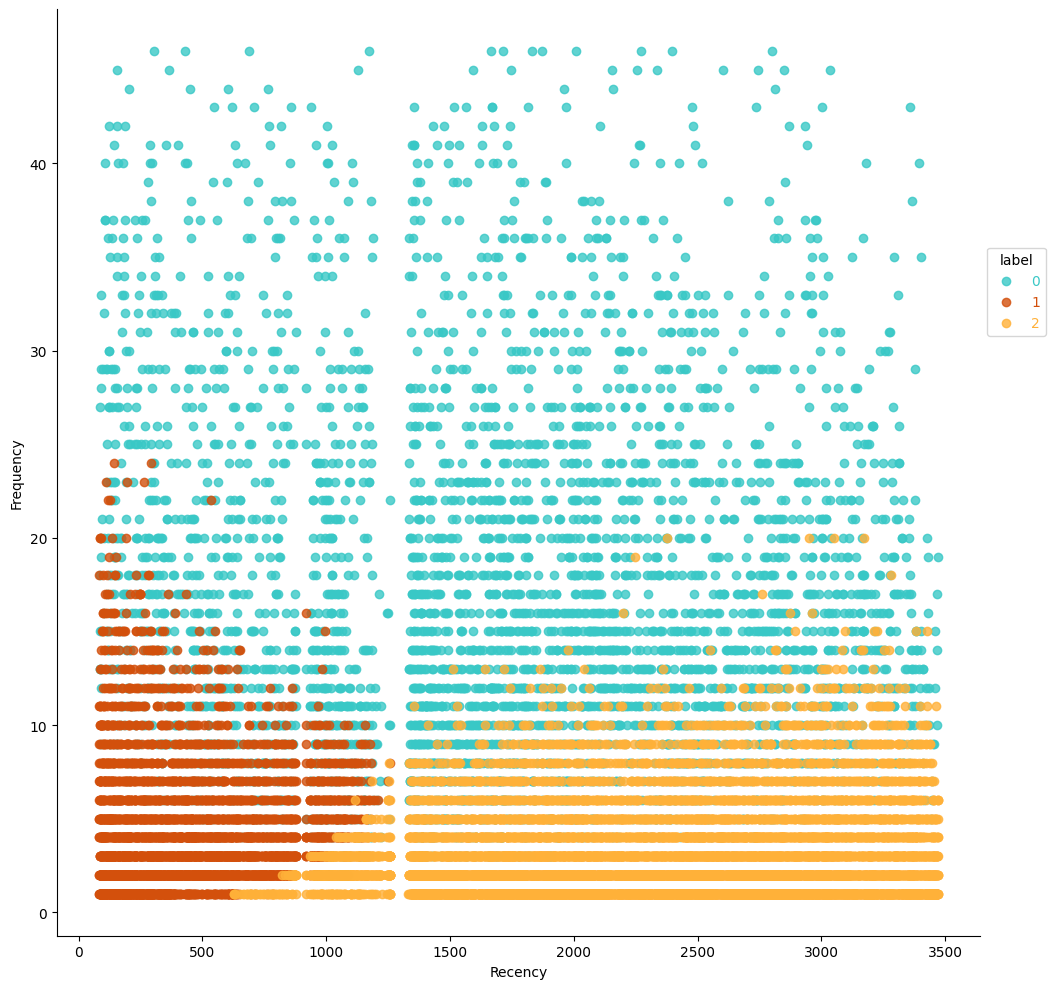

In [136]:
#define a custom palette
customPalette = ['#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)

data = pd.DataFrame(data=rfm_fig,columns=['Customer ID','Cluster','Recency','Frequency','Monetary'])

#plot data with seaborn (don't add a legend yet)
facet = sns.lmplot(data=data, x='Recency', y='Frequency', hue='Cluster', height=10,
                   fit_reg=False, legend=False)

#add a legend
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="label", fancybox=True)
#change colors of labels
for i, text in enumerate(leg.get_texts()):
    plt.setp(text, color = customPalette[i])

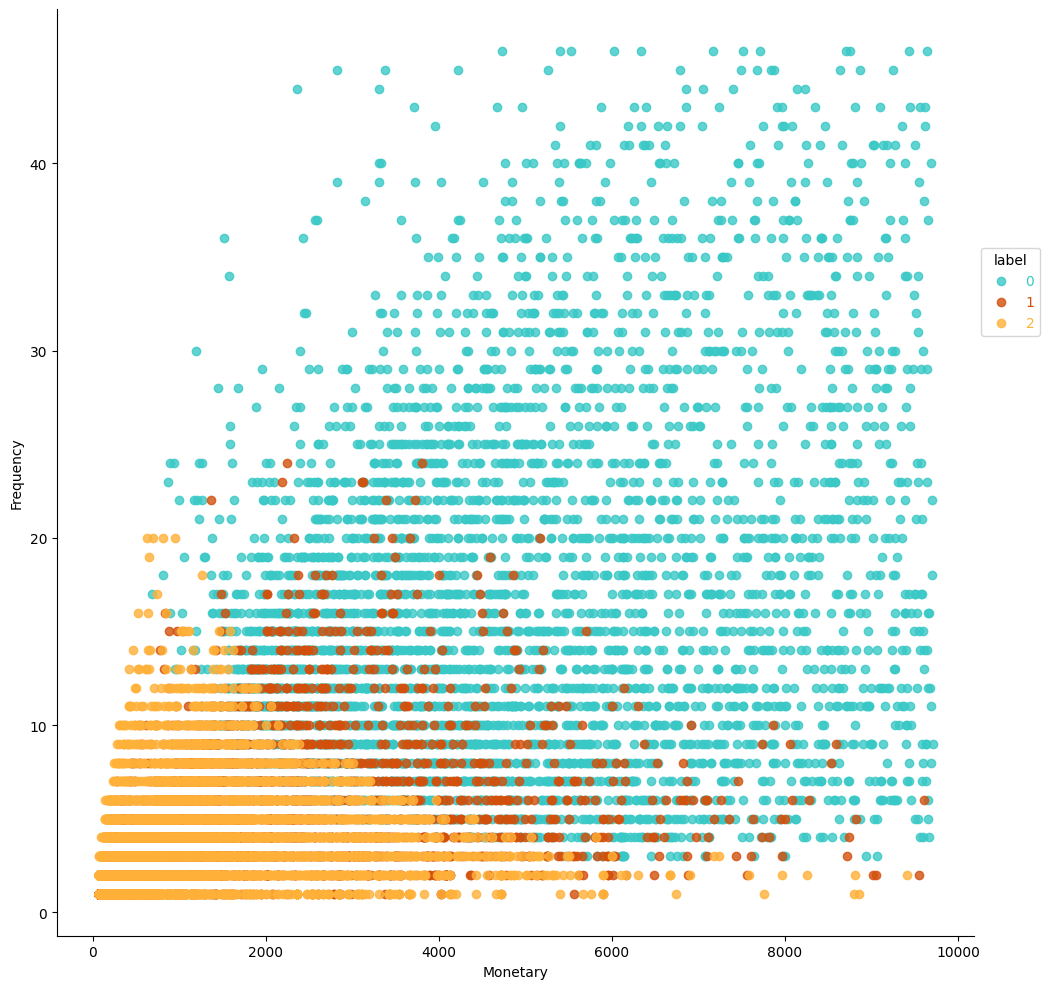

In [137]:
# fig, ax = plt.subplots(figsize=(10, 8))
#plot data with seaborn (don't add a legend yet)
facet = sns.lmplot(data=data, x='Monetary', y='Frequency', hue='Cluster', height=10,
                   fit_reg=False, legend=False)

#add a legend
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="label", fancybox=True)
#change colors of labels
for i, text in enumerate(leg.get_texts()):
    plt.setp(text, color = customPalette[i])

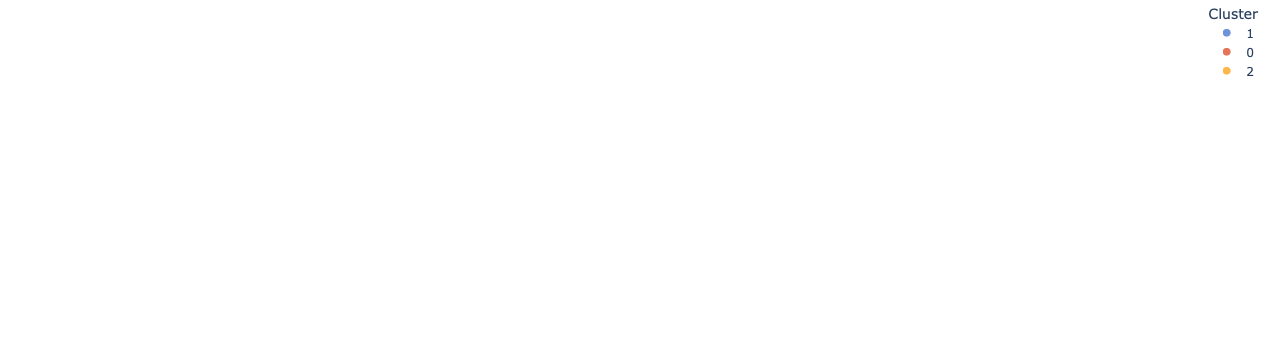

In [139]:
rfm_fig['Cluster'] = rfm_fig['Cluster'].astype(str)

import plotly.express as px
fig = px.scatter_3d(rfm_fig,x='Recency', y='Frequency', z='Monetary',
              color='Cluster', opacity=0.7,color_discrete_sequence=px.colors.qualitative.G10)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [140]:
cluster_avg = sales_df[['Cluster','Recency','Frequency','Monetary']].groupby(['Cluster']).mean()
population_avg = sales_df[['Recency','Frequency','Monetary']].head().mean()

In [141]:
cluster_avg

,Recency,Frequency,Monetary
Cluster,,,
0,1479.293113,32.513600,12030.894443
1,391.311772,4.763172,1613.544493
2,2424.049477,2.845067,712.673059


In [142]:
population_avg

Recency       794.800
Frequency       7.400
Monetary     3227.636
dtype: float64

In [143]:
relative_imp = cluster_avg / population_avg - 1
relative_imp.round(2)

,Recency,Frequency,Monetary
Cluster,,,
0,0.86,3.39,2.73
1,-0.51,-0.36,-0.50
2,2.05,-0.62,-0.78


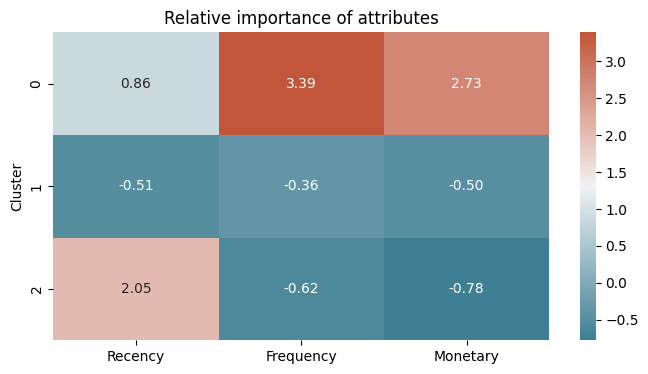

In [144]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)
# Plot heatmap
plt.figure(figsize=(8, 4))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap=cmap)
plt.show()

In [149]:
quantiles = sales_df[['Recency', 'Frequency', 'Monetary', 'Cluster']].quantile(q=[0.2,0.4,0.6,0.8])
quantiles = quantiles.to_dict()
    
def RScore(x,p,d):
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 2
    else:
        return 1   
    
def FMScore(x,p,d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]: 
        return 3
    elif x <= d[p][0.8]: 
        return 4
    else:
        return 5
    
sales_df['R'] = sales_df['Recency'].apply(RScore, args=('Recency',quantiles,))
sales_df['F'] = sales_df['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
sales_df['M'] = sales_df['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [150]:
# Concat RFM quartile values to create RFM Segments
def join_rfm(x): 
    return str(x['R']) + str(x['F']) + str(x['M'])
    
sales_df['RFM_Segment'] = sales_df.apply(join_rfm, axis=1)
# Calculate RFM_Score
sales_df['RFM_Score'] = sales_df[['R','F','M']].sum(axis=1)

In [151]:
sales_df['RFM_Segment'].unique()

array(['534', '422', '555', '444', '211', '133', '455', '122', '532',
       '323', '111', '144', '314', '154', '424', '212', '311', '443',
       '412', '312', '112', '454', '233', '423', '123', '155', '354',
       '255', '414', '113', '543', '535', '342', '411', '313', '355',
       '143', '345', '213', '243', '244', '434', '245', '322', '544',
       '234', '512', '232', '333', '135', '545', '223', '433', '445',
       '222', '214', '413', '134', '343', '145', '132', '221', '344',
       '324', '442', '121', '332', '124', '131', '224', '432', '242',
       '523', '511', '334', '142', '254', '225', '554', '514', '533',
       '335', '421', '553', '215', '513', '425', '522', '353', '435',
       '524', '231', '153', '114', '415', '542', '235', '321', '325',
       '515', '453', '241', '115', '125', '141', '525', '531', '521',
       '431', '253', '352', '252', '315', '331', '152'], dtype=object)

In [152]:
# Create human friendly RFM labels
segt_map = {
    
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At risk',
    r'[1-2]5': 'Can\'t lose them',
    r'3[1-2]': 'About to sleep',
    r'33': 'Need attention',
    r'[3-4][4-5]': 'Loyal customers',
    r'41': 'Promising',
    r'51': 'New customers',
    r'[4-5][2-3]': 'Potential loyalists',
    r'5[4-5]': 'Champions'
}
# rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)+ rfm['M'].map(str)
sales_df['Segment'] = sales_df['R'].map(str) + sales_df['F'].map(str)
sales_df['Segment'] = sales_df['Segment'].replace(segt_map, regex=True)
# Create some human friendly labels for the scores
sales_df['Score'] = 'Green'
sales_df.loc[sales_df['RFM_Score']>5,'Score'] = 'Bronze' 
sales_df.loc[sales_df['RFM_Score']>7,'Score'] = 'Silver' 
sales_df.loc[sales_df['RFM_Score']>9,'Score'] = 'Gold' 
sales_df.loc[sales_df['RFM_Score']>10,'Score'] = 'Platinum'
# List the head of the table to view the 
sales_df.head(5)

,ClientID,Recency,Frequency,Monetary,Cluster,R,F,M,RFM_Segment,RFM_Score,Segment,Score
0,..8220484146,17.0,4.0,4425.90,1,5,3,4,534,12,Potential loyalists,Platinum
3,.8393863665,622.0,3.0,495.60,1,4,2,2,422,8,Potential loyalists,Silver
4,.9894384197,144.0,18.0,7776.20,0,5,5,5,555,15,Champions,Platinum
11,.C Balachander9884886817,732.0,11.0,3250.73,0,4,4,4,444,12,Loyal customers,Platinum
15,A Velu9556186556,2459.0,1.0,189.75,2,2,1,1,211,4,Hibernating,Green


In [153]:
import seaborn as sns
sns.set_theme(style="whitegrid")

In [154]:
sales_df.head()

,ClientID,Recency,Frequency,Monetary,Cluster,R,F,M,RFM_Segment,RFM_Score,Segment,Score
0,..8220484146,17.0,4.0,4425.90,1,5,3,4,534,12,Potential loyalists,Platinum
3,.8393863665,622.0,3.0,495.60,1,4,2,2,422,8,Potential loyalists,Silver
4,.9894384197,144.0,18.0,7776.20,0,5,5,5,555,15,Champions,Platinum
11,.C Balachander9884886817,732.0,11.0,3250.73,0,4,4,4,444,12,Loyal customers,Platinum
15,A Velu9556186556,2459.0,1.0,189.75,2,2,1,1,211,4,Hibernating,Green


In [155]:
fig1 = sales_df.groupby(['Segment']).count().unstack().fillna(0)
fig2 = sales_df.groupby(['Score']).count().unstack().fillna(0)

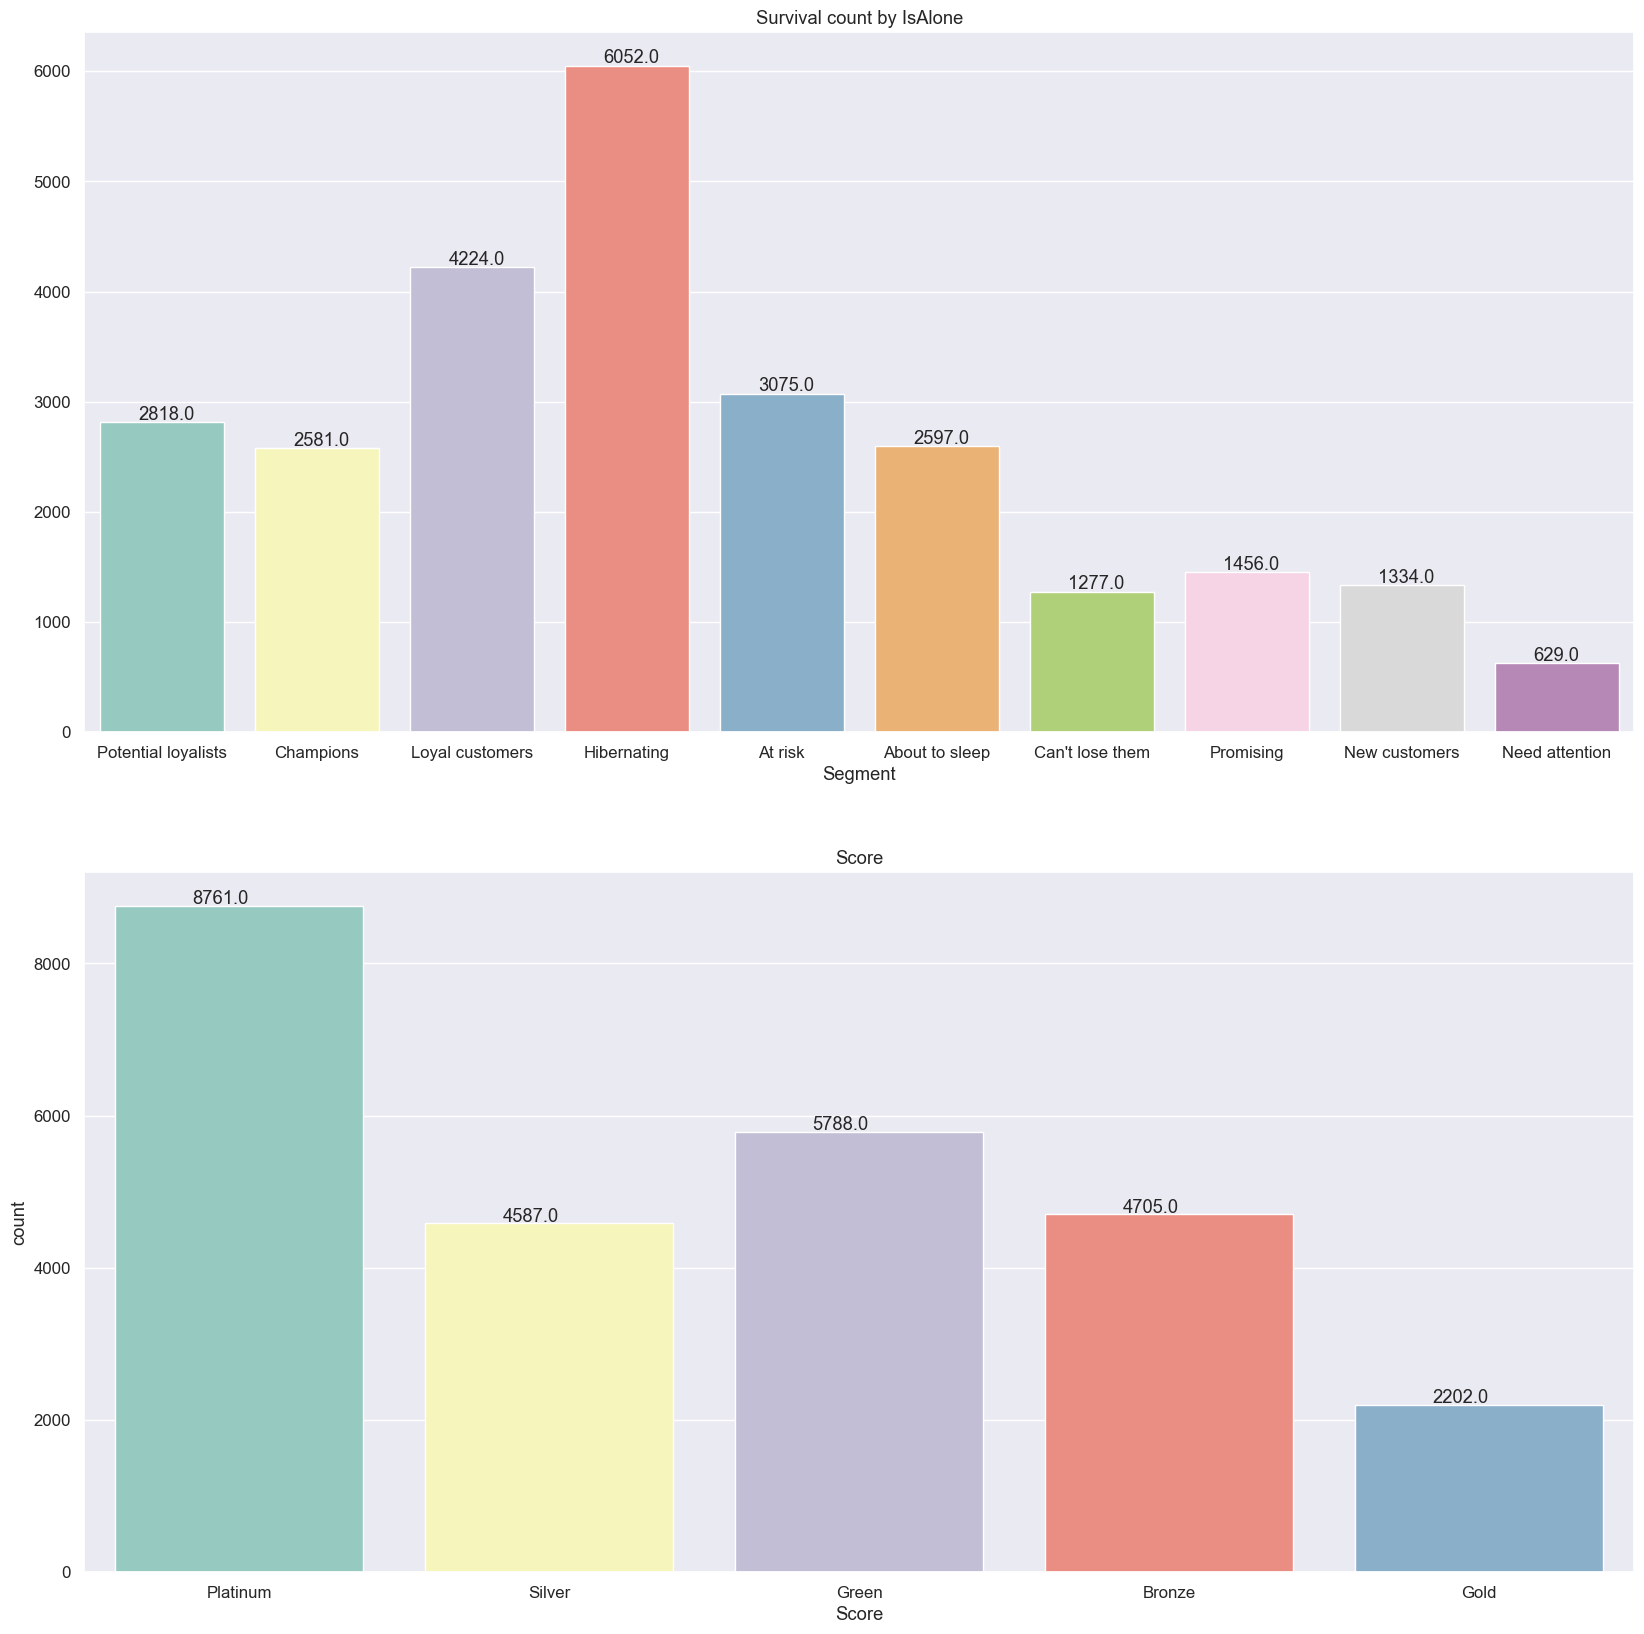

In [164]:
sns.set(font_scale=1.1)

#Pie Chart
f,ax=plt.subplots(2,1,figsize=(20,20))

# Assuming 'Segment' is one of the columns in your DataFrame
sns.countplot(x='Segment', data=sales_df[['Recency', 'Frequency', 'Monetary', 'Cluster', 'R', 'F', 'M', 'RFM_Segment', 'RFM_Score', 'Segment', 'Score']], ax=ax[0], palette="Set3")
ax[0].set_title('Segment')
ax[0].set_ylabel('')
ax[0].set_title('Survival count by IsAlone')
# ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)

#Bar chart - count
sns.countplot(x='Score', data=sales_df[['Recency', 'Frequency', 'Monetary', 'Cluster', 'R', 'F', 'M', 'RFM_Segment', 'RFM_Score', 'Segment', 'Score']],ax=ax[1],palette="Set3")
ax[1].set_title('Score')

for p in ax[0].patches:
    ax[0].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+20))

for p in ax[1].patches:
    ax[1].annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+20))


plt.show()

In [167]:
# Aggregate data by each customer
fig3 = sales_df.groupby('Segment').agg({'ClientID': lambda x: len(x)}).reset_index()

# Rename columns
fig3.rename(columns={'ClientID': 'Count'}, inplace=True)
fig3['percent'] = (fig3['Count'] / fig3['Count'].sum()) * 100
fig3['percent'] = fig3['percent'].round(1)

fig3.head()

,Segment,Count,percent
0,About to sleep,2597,10.0
1,At risk,3075,11.8
2,Can't lose them,1277,4.9
3,Champions,2581,9.9
4,Hibernating,6052,23.2


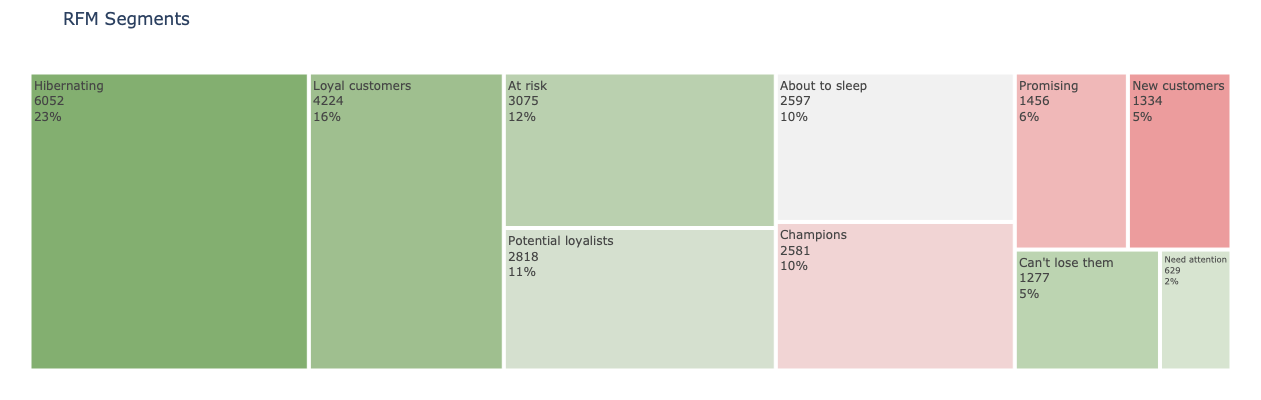

In [168]:
#Creating a Treemap with Plotly Express
# colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] #color palette
colors=['#83af70','#9fbf8f','#bad0af','#d5e0cf','#f1f1f1','#f1d4d4','#f0b8b8','#ec9c9d'] #color palette
import plotly.express as px

fig = px.treemap(fig3, path=['Segment'],values='Count'
                 , width=800, height=400
                 ,title="RFM Segments")

fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))

fig.data[0].textinfo = 'label+text+value+percent root'
fig.show()

In [170]:
# Aggregate data by each customer
fig4 = sales_df.groupby('Score').agg({'ClientID': lambda x: len(x)}).reset_index()


# Rename columns
fig4.rename(columns={'ClientID': 'Count'}, inplace=True)
fig4['percent'] = (fig4['Count'] / fig4['Count'].sum()) * 100
fig4['percent'] = fig4['percent'].round(1)

fig4.head()

,Score,Count,percent
0,Bronze,4705,18.1
1,Gold,2202,8.5
2,Green,5788,22.2
3,Platinum,8761,33.6
4,Silver,4587,17.6


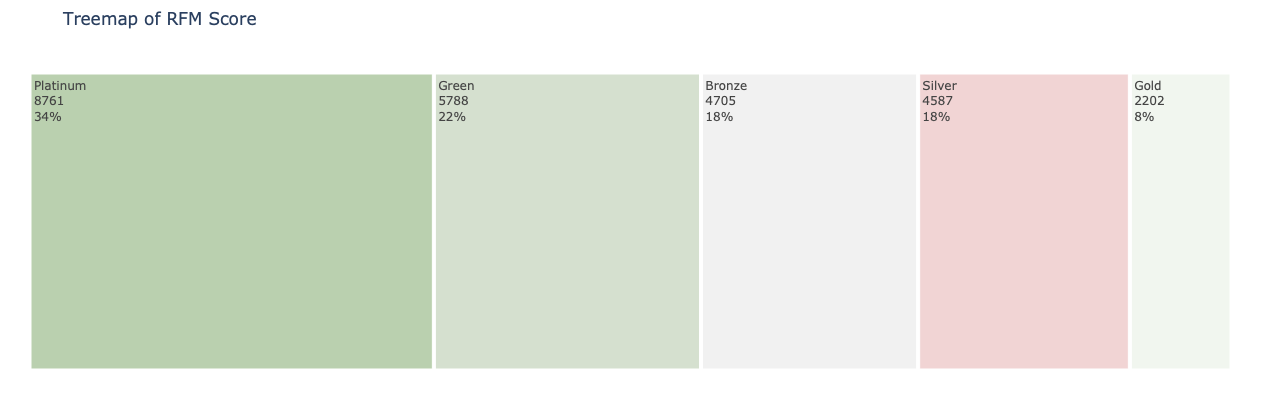

In [171]:
#Creating a Treemap with Plotly Express
# colors=['#fae588','#f79d65','#f9dc5c','#e8ac65','#e76f51','#ef233c','#b7094c'] #color palette
colors=['#bad0af','#d5e0cf','#f1f1f1','#f1d4d4'] #color palette
import plotly.express as px

fig = px.treemap(fig4, path=['Score'],values='Count'
                 , width=800, height=400
                 ,title="Treemap of RFM Score")

fig.update_layout(
    treemapcolorway = colors, #defines the colors in the treemap
    margin = dict(t=50, l=25, r=25, b=25))

fig.data[0].textinfo = 'label+text+value+percent root'
fig.show()

## RFM Interpretation

In [173]:
# Aggregate data by each customer
rfm1 = sales_df.groupby(['Cluster','Segment'],).agg({'ClientID': lambda x: len(x)}).reset_index()

# Rename columns
rfm1.rename(columns={'ClientID': 'Count'}, inplace=True)
rfm1['percent'] = (rfm1['Count'] / rfm1.groupby('Cluster')['Count'].transform('sum')) * 100
rfm1['percent'] = rfm1['percent'].round(1)

rfm1

,Cluster,Segment,Count,percent
0,0,About to sleep,16,0.2
1,0,At risk,644,9.3
2,0,Can't lose them,1241,18.0
3,0,Champions,1453,21.0
4,0,Hibernating,5,0.1
5,0,Loyal customers,3339,48.3
6,0,Need attention,92,1.3
7,0,Potential loyalists,120,1.7
8,0,Promising,2,0.0
9,1,Champions,1128,19.6


In [174]:
#sales_df['RecencyScore'] = pd.qcut (sales_df['Recency'], q = 5, labels = ['5', '4', '3', '2', '1'])
#sales_df['FrequencyScore'] = pd.qcut (sales_df['Frequency'], q = 5, labels = ['1', '2', '3', '4', '5'])
#sales_df['MonetaryScore'] = pd.qcut (sales_df['Monetary'], q = 5, labels = ['1', '2', '3', '4', '5'])

In [175]:
#scaler = MinMaxScaler()
#sales_df['RecencyScore'] = scaler.fit_transform(sales_df[['Recency']])
#sales_df['FrequencyScore'] = scaler.fit_transform(sales_df[['Frequency']])
#sales_df['MonetaryScore'] = scaler.fit_transform(sales_df[['Monetary']])

#sales_df.sample(4)

In [176]:
#sales_df.loc[:, 'RFM_score'] = sales_df['RecencyScore'].astype(int) + sales_df['MonetaryScore'].astype(int) + sales_df['FrequencyScore'].astype(int)
#sales_df.sample(3) 

In [177]:
#segment_labels = ["Low_Value", "Mid-Value", "High-Value"]
#sales_df.loc[:, "Value Segment"] = pd.qcut(sales_df["RFM_score"], q=3, labels=segment_labels)

In [178]:
#sales_df.sample(3)

In [179]:
#sales_df['RFM_score'].describe()

In [180]:
#sales_df.loc[:, "RFM Customer Segments"] = ""

#sales_df.loc[sales_df.loc[:, "RFM_score"] >= 9, "RFM Customer Segments"] = "Champions"
#sales_df.loc[(sales_df.loc[:, "RFM_score"] >= 6) & (sales_df["RFM_score"] < 9), "RFM Customer Segments"] = "Potential Loyalists"
#sales_df.loc[(sales_df.loc[:, 'RFM_score'] >= 4) & (sales_df['RFM_score'] <6), 'RFM Customer Segments'] = "Can't Lose"
#sales_df.loc[(sales_df.loc[:, 'RFM_score'] < 4), 'RFM Customer Segments'] = "Lost"

# Print the updated data with RFM segments
#sales_df.sample(3)

In [181]:
# Assuming you have a DataFrame named sales_df

"""
segment_counts = sales_df['Value Segment'].value_counts()

# Define pastel colors
pastel_colors = plt.cm.Pastel1(np.arange(len(segment_counts)))

# Set the color for the 'Champions' segment
champions_color = (158/255, 202/255, 225/255)  # RGB values

# Create a bar chart with custom colors
plt.figure(figsize=(10, 6))
bars = plt.bar(segment_counts.index, segment_counts.values, color=pastel_colors)

# Set the color for the 'Champions' segment
for bar, segment in zip(bars, segment_counts.index):
    if segment == 'Champions':
        bar.set_color(champions_color)

# Set labels and title
plt.title('Comparison of Value Segments')
plt.xlabel('Value Segments')
plt.ylabel('Number of Customers')

# Hide the legend
plt.legend().set_visible(False)

# Show the plot
plt.show()

"""

"\nsegment_counts = sales_df['Value Segment'].value_counts()\n\n# Define pastel colors\npastel_colors = plt.cm.Pastel1(np.arange(len(segment_counts)))\n\n# Set the color for the 'Champions' segment\nchampions_color = (158/255, 202/255, 225/255)  # RGB values\n\n# Create a bar chart with custom colors\nplt.figure(figsize=(10, 6))\nbars = plt.bar(segment_counts.index, segment_counts.values, color=pastel_colors)\n\n# Set the color for the 'Champions' segment\nfor bar, segment in zip(bars, segment_counts.index):\n    if segment == 'Champions':\n        bar.set_color(champions_color)\n\n# Set labels and title\nplt.title('Comparison of Value Segments')\nplt.xlabel('Value Segments')\nplt.ylabel('Number of Customers')\n\n# Hide the legend\nplt.legend().set_visible(False)\n\n# Show the plot\nplt.show()\n\n"

In [182]:
# Assuming you have a DataFrame named sales_df
"""
segment_counts = sales_df['RFM Customer Segments'].value_counts()

# Define pastel colors
pastel_colors = plt.cm.Pastel1(np.arange(len(segment_counts)))

# Set the color for the 'Champions' segment
champions_color = (158/255, 202/255, 225/255)  # RGB values

# Create a bar chart with custom colors
plt.figure(figsize=(10, 6))
bars = plt.bar(segment_counts.index, segment_counts.values, color=pastel_colors)

# Set the color for the 'Champions' segment
for bar, segment in zip(bars, segment_counts.index):
    if segment == 'Champions':
        bar.set_color(champions_color)

# Set labels and title
plt.title('Comparison of RFM Segments')
plt.xlabel('RFM Segments')
plt.ylabel('Number of Customers')

# Hide the legend
plt.legend().set_visible(False)

# Show the plot
plt.show()
"""

"\nsegment_counts = sales_df['RFM Customer Segments'].value_counts()\n\n# Define pastel colors\npastel_colors = plt.cm.Pastel1(np.arange(len(segment_counts)))\n\n# Set the color for the 'Champions' segment\nchampions_color = (158/255, 202/255, 225/255)  # RGB values\n\n# Create a bar chart with custom colors\nplt.figure(figsize=(10, 6))\nbars = plt.bar(segment_counts.index, segment_counts.values, color=pastel_colors)\n\n# Set the color for the 'Champions' segment\nfor bar, segment in zip(bars, segment_counts.index):\n    if segment == 'Champions':\n        bar.set_color(champions_color)\n\n# Set labels and title\nplt.title('Comparison of RFM Segments')\nplt.xlabel('RFM Segments')\nplt.ylabel('Number of Customers')\n\n# Hide the legend\nplt.legend().set_visible(False)\n\n# Show the plot\nplt.show()\n"

In [183]:
# Assuming you have a DataFrame named sales_df
"""
segment_scores = sales_df.groupby('RFM Customer Segments')[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].mean().reset_index()

# Define colors
colors = [(158/255, 202/255, 225/255), (94/255, 158/255, 217/255), (32/255, 102/255, 148/255)]

# Create a bar chart with Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25
bar_positions = np.arange(len(segment_scores['RFM Customer Segments']))

ax.bar(bar_positions - bar_width, segment_scores['RecencyScore'], bar_width, label='Recency Score', color=colors[0])
ax.bar(bar_positions, segment_scores['FrequencyScore'], bar_width, label='Frequency Score', color=colors[1])
ax.bar(bar_positions + bar_width, segment_scores['MonetaryScore'], bar_width, label='Monetary Score', color=colors[2])

# Set labels and title
ax.set_title('Comparison of RFM Segments based on Recency, Frequency, and Monetary Scores')
ax.set_xlabel('RFM Segments')
ax.set_ylabel('Score')

# Set x-axis ticks and labels
ax.set_xticks(bar_positions)
ax.set_xticklabels(segment_scores['RFM Customer Segments'])

# Show legend
ax.legend()

# Show the plot
plt.show()
"""

"\nsegment_scores = sales_df.groupby('RFM Customer Segments')[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].mean().reset_index()\n\n# Define colors\ncolors = [(158/255, 202/255, 225/255), (94/255, 158/255, 217/255), (32/255, 102/255, 148/255)]\n\n# Create a bar chart with Matplotlib\nfig, ax = plt.subplots(figsize=(10, 6))\n\nbar_width = 0.25\nbar_positions = np.arange(len(segment_scores['RFM Customer Segments']))\n\nax.bar(bar_positions - bar_width, segment_scores['RecencyScore'], bar_width, label='Recency Score', color=colors[0])\nax.bar(bar_positions, segment_scores['FrequencyScore'], bar_width, label='Frequency Score', color=colors[1])\nax.bar(bar_positions + bar_width, segment_scores['MonetaryScore'], bar_width, label='Monetary Score', color=colors[2])\n\n# Set labels and title\nax.set_title('Comparison of RFM Segments based on Recency, Frequency, and Monetary Scores')\nax.set_xlabel('RFM Segments')\nax.set_ylabel('Score')\n\n# Set x-axis ticks and labels\nax.set_xticks(bar

In [184]:
#champions_df = sales_df[sales_df['RFM Customer Segments'] == 'Champions']
#champions_df.to_csv("outputs/champions.csv")
#champions_df

In [185]:
#potloyalists_df = sales_df[sales_df['RFM Customer Segments'] == 'Potential Loyalists']
#potloyalists_df.to_csv("outputs/potential_loyalists.csv")
#potloyalists_df

In [186]:
#potloyalists_df['total_spending'].sum()

In [187]:
#cantlose_df = sales_df[sales_df['RFM Customer Segments'] == 'Can\'t Lose']
#cantlose_df.to_csv("outputs/cant_lose.csv")
#cantlose_df

In [188]:
# Create a scatter plot with color-coding for segments
"""
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Recency',
    y='Frequency',
    hue='RFM Customer Segments',
    data=sales_df,
    palette='Set1',  
    s=100,  
)
plt.title('Customer Segmentation Scatter Plot')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Segment', loc='upper right')
plt.show()
"""

"\nplt.figure(figsize=(10, 6))\nsns.scatterplot(\n    x='Recency',\n    y='Frequency',\n    hue='RFM Customer Segments',\n    data=sales_df,\n    palette='Set1',  \n    s=100,  \n)\nplt.title('Customer Segmentation Scatter Plot')\nplt.xlabel('Recency')\nplt.ylabel('Frequency')\nplt.legend(title='Segment', loc='upper right')\nplt.show()\n"